## Autogen
데이터 시각화 에이전트 구축하기

In [1]:
from dotenv import load_dotenv
import os

load_dotenv()

True

In [2]:
import autogen
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import Image

from autogen.coding import LocalCommandLineCodeExecutor

config_list = [{"model": "gpt-4o-mini", "api_key": os.environ["OPENAI_API_KEY"]}]
llm_config = {"config_list": config_list}

In [3]:
user_proxy = autogen.UserProxyAgent(
    name="User_proxy",
    system_message="A human admin.",
    code_execution_config={
        # the executor to run the generated code
        "executor": LocalCommandLineCodeExecutor(work_dir="group_chat"),
    },
    human_input_mode="NEVER",
)
coder = autogen.AssistantAgent(
    name="Coder",  # the default assistant agent is capable of solving problems with code
    llm_config=llm_config,
)
critic = autogen.AssistantAgent(
    name="Critic",
    system_message="""비평가. 
    명확한 근거를 제시하면서 1(나쁨)~10(좋음)의 점수를 제공하여 주어진 시각화 코드의 품질을 평가하는 데 고도로 숙련된 조력자입니다. 
    각 평가에 대해 시각화 모범 사례를 고려해야 합니다. 구체적으로 다음 차원에서 코드를 신중하게 평가할 수 있습니다.
- 버그(버그): 버그, 구문 오류 또는 오타가 있나요? 코드가 컴파일되지 않는 이유는 무엇인가요? 어떻게 수정해야 하나요? 
버그가 있는 경우 버그 점수는 반드시 5점 미만이어야 합니다.
- 데이터 변환(변환): 데이터가 시각화 유형에 맞게 적절하게 변환되었나요? 
예를 들어, 필요한 경우 데이터 집합이 적절하게 필터링, 집계 또는 그룹화되었는가? 날짜 필드를 사용하는 경우, 날짜 필드가 먼저 날짜 개체 등으로 변환되었는가?
- 목표 준수(규정 준수): 코드가 지정된 비주얼리제이션 목표를 얼마나 잘 충족합니까?
- 시각화 유형(유형): 모범 사례를 고려할 때 시각화 유형이 데이터 및 의도에 적합한가? 
인사이트를 전달하는 데 더 효과적인 시각화 유형이 있는가? 다른 시각화 유형이 더 적절하다면 점수는 반드시 5점 미만이어야 합니다.
- 데이터 인코딩(인코딩): 데이터가 시각화 유형에 맞게 적절하게 인코딩되어 있습니까?
- 미학(심미성): 시각화의 미학이 시각화 유형 및 데이터에 적합한가?

위의 각 차원에 대해 점수를 제공해야 합니다.
{bugs: 0, 변환: 0, 규정 준수: 0, type: 0, encoding: 0, 미학: 0}
코드를 제안하지 마세요.
마지막으로 위의 비평을 바탕으로 코더가 코드를 개선하기 위해 취해야 할 구체적인 조치 목록을 제안하세요.
""",
    llm_config=llm_config,
)

groupchat = autogen.GroupChat(agents=[user_proxy, coder, critic], messages=[], max_round=20)
manager = autogen.GroupChatManager(groupchat=groupchat, llm_config=llm_config)

In [4]:
user_proxy.initiate_chat(
    manager,
    message="""다음 URL(https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv)에서 데이터를 다운로드하고, 
    age와 pclass 변수 간의 관계를 차트로 생성해주세요. 차트는 파일로 저장해주세요. 
    차트를 생성하기 이전에 확인을 위해 데이터셋의 열을 출력하세요.
    """,
)

User_proxy (to chat_manager):

다음 URL(https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv)에서 데이터를 다운로드하고, 
    age와 pclass 변수 간의 관계를 차트로 생성해주세요. 차트는 파일로 저장해주세요. 
    차트를 생성하기 이전에 확인을 위해 데이터셋의 열을 출력하세요.
    

--------------------------------------------------------------------------------

Next speaker: Coder

Coder (to chat_manager):

먼저, 지정된 URL에서 CSV 파일을 다운로드합니다. 그런 다음, 데이터셋의 열을 확인하고, `age`와 `pclass` 변수 간의 관계를 시각화하는 차트를 생성한 후 파일로 저장하겠습니다.

이 작업을 위해 다음 단계를 수행할 것입니다:

1. 데이터 다운로드 및 로드
2. 데이터셋의 열 출력
3. `age`와 `pclass` 간의 관계를 시각화하는 차트 생성 및 저장

아래 코드를 실행하여 이 작업을 완료할 수 있습니다.

```python
# filename: plot_age_pclass.py
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 다운로드 및 로드
url = 'https://github.com/mwaskom/seaborn-data/raw/master/titanic.csv'
data = pd.read_csv(url)

# 2. 데이터셋의 열 출력
print("Columns in the dataset:")
print(data.columns)

# 3. age와 pclass 변수 간의 관계를 시각화하는 차트 생성
plt.figure(figsize=(10, 6))
plt.scatter(data['pclass'], data['age'], alpha=0.5)
plt.title('

ChatResult(chat_id=None, chat_history=[{'content': '다음 URL(https://github.com/mwaskom/seaborn-data/blob/master/titanic.csv)에서 데이터를 다운로드하고, \n    age와 pclass 변수 간의 관계를 차트로 생성해주세요. 차트는 파일로 저장해주세요. \n    차트를 생성하기 이전에 확인을 위해 데이터셋의 열을 출력하세요.\n    ', 'role': 'assistant', 'name': 'User_proxy'}, {'content': '먼저, 지정된 URL에서 CSV 파일을 다운로드합니다. 그런 다음, 데이터셋의 열을 확인하고, `age`와 `pclass` 변수 간의 관계를 시각화하는 차트를 생성한 후 파일로 저장하겠습니다.\n\n이 작업을 위해 다음 단계를 수행할 것입니다:\n\n1. 데이터 다운로드 및 로드\n2. 데이터셋의 열 출력\n3. `age`와 `pclass` 간의 관계를 시각화하는 차트 생성 및 저장\n\n아래 코드를 실행하여 이 작업을 완료할 수 있습니다.\n\n```python\n# filename: plot_age_pclass.py\nimport pandas as pd\nimport matplotlib.pyplot as plt\n\n# 1. 데이터 다운로드 및 로드\nurl = \'https://github.com/mwaskom/seaborn-data/raw/master/titanic.csv\'\ndata = pd.read_csv(url)\n\n# 2. 데이터셋의 열 출력\nprint("Columns in the dataset:")\nprint(data.columns)\n\n# 3. age와 pclass 변수 간의 관계를 시각화하는 차트 생성\nplt.figure(figsize=(10, 6))\nplt.scatter(data[\'pclass\'], data[\'age\'], alpha=0.5)\nplt.title(\'Relationship b

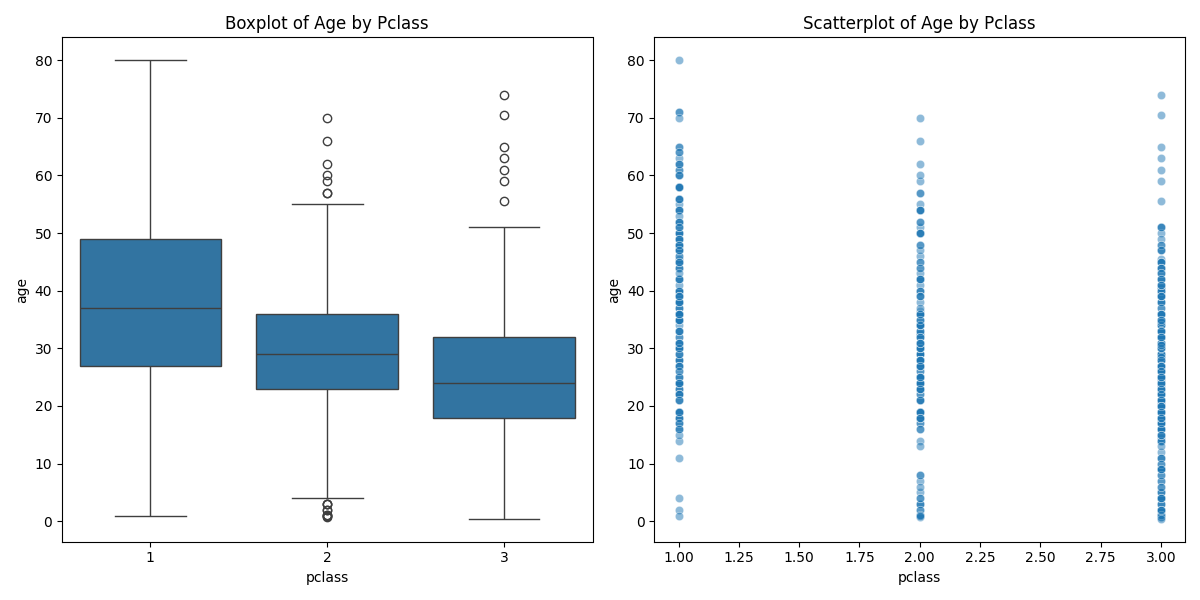

In [5]:
Image(filename="group_chat/age_vs_pclass_combined.png")